# Unsupervised Learning: Clustering with K-Means

## Introduction
This project demonstrates the application of K-means clustering, an unsupervised learning algorithm, to the Iris dataset. The goal is to segment the data into distinct groups based on flower characteristics.

## 1. Data Loading
Load the Iris dataset, which is commonly used for testing clustering and classification algorithms.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. Data Exploration and Preprocessing
Explore the dataset to understand its structure, and preprocess it if necessary.

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 3. Applying K-Means Clustering
Apply the K-means clustering algorithm to identify groups within the Iris dataset.

In [ ]:
df.drop('target', axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42).fit(df.drop('target', axis=1))
df['cluster'] = kmeans.labels_

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,4
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,3


## 4. Evaluating Clustering Performance
Evaluate how well the clusters have been formed and how they correspond to the known species.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['target'], df['cluster']))

[[ 0 28 22]
 [47  0  3]
 [50  0  0]]


## 5. Visualization of Clusters
Visualize the clusters to understand their distribution and separation.

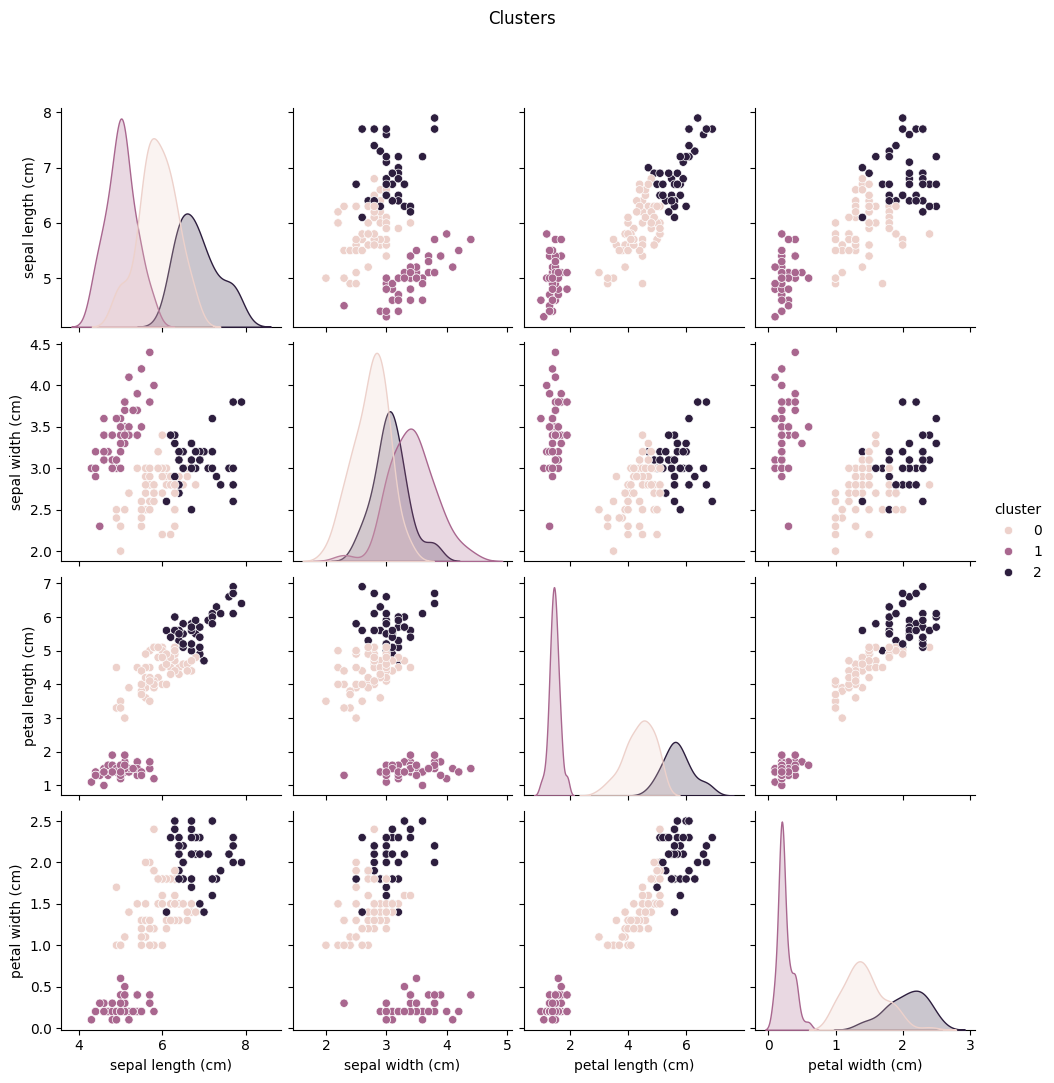

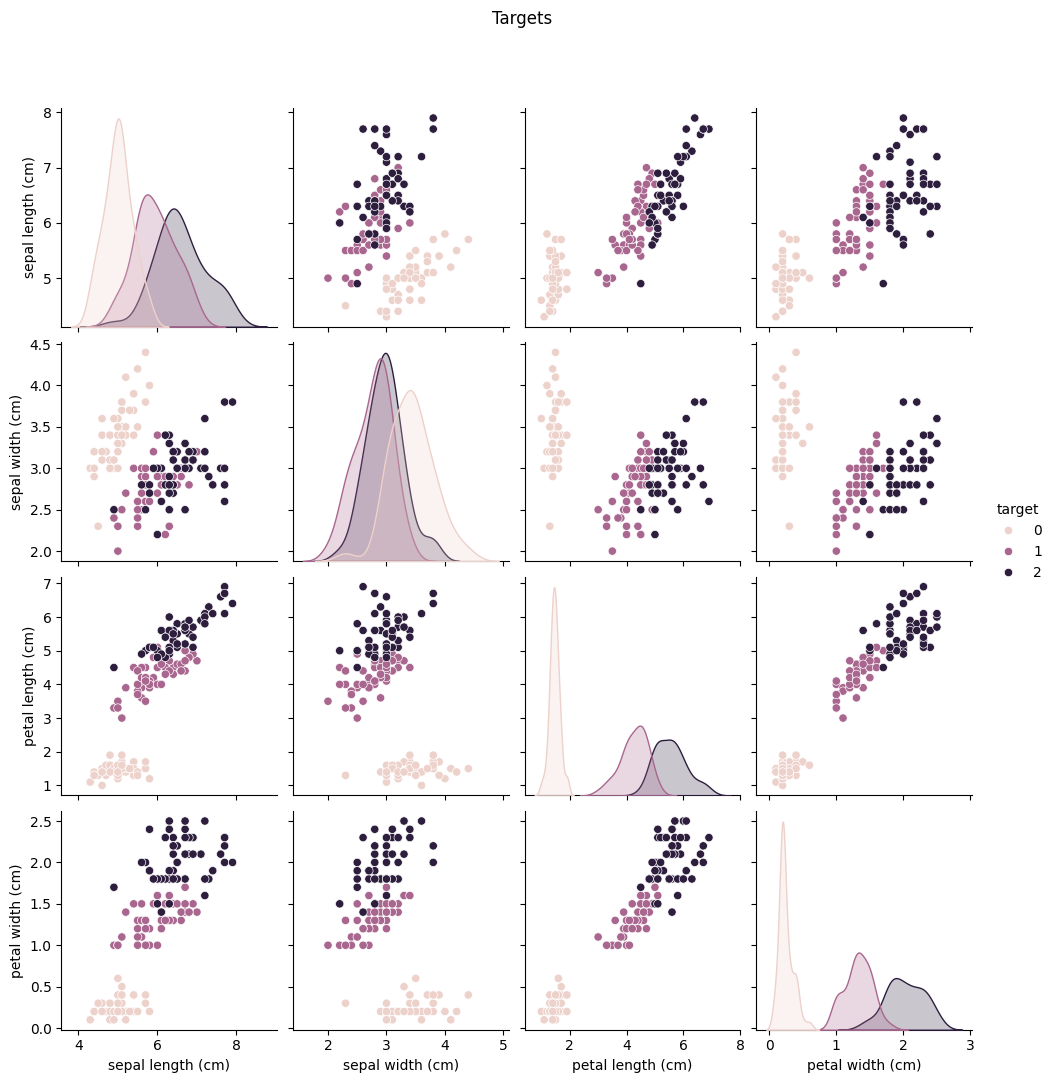

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.pairplot(df, hue='cluster', vars=data.feature_names)
g.fig.suptitle("Clusters", y=1.08)

g = sns.pairplot(df, hue='target', vars=data.feature_names)
g.fig.suptitle("Targets", y=1.08)

plt.show()